In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

C:\Users\kater\AppData\Local\Temp\ipykernel_7824\615924438.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:

# Read the earthquake data
earthquake_data = pd.read_csv('all_month.csv')
earthquake_data


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.310,0.150,22.0,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.340,0.140,23.0,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.300,NaN,NaN,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.160,0.139,11.0,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.070,0.160,11.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,2023-12-19T02:43:10.876Z,-7.242500,119.138700,593.76,4.90,mb,95.0,26.0,2.074000,0.75,...,2024-01-16T01:30:21.040Z,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107.0,reviewed,us,us
8882,2023-12-19T02:42:29.472Z,-22.785000,172.366200,10.00,5.30,mww,64.0,74.0,4.546000,0.74,...,2024-01-15T23:45:16.040Z,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17.0,reviewed,us,us
8883,2023-12-19T02:39:21.180Z,33.111333,-115.624833,9.51,1.34,ml,32.0,93.0,0.066410,0.19,...,2023-12-19T15:49:01.616Z,"8 km N of Westmorland, CA",earthquake,0.21,0.520,0.214,20.0,reviewed,ci,ci
8884,2023-12-19T02:35:17.230Z,38.826332,-122.804833,3.06,0.64,md,8.0,147.0,0.005036,0.01,...,2023-12-19T04:50:10.666Z,"7 km NW of The Geysers, CA",earthquake,1.08,1.470,0.120,7.0,automatic,nc,nc


In [7]:
latest_events = earthquake_data.head()
latest_events

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.31,0.150,22.0,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.34,0.140,23.0,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.16,0.139,11.0,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.07,0.160,11.0,automatic,nc,nc


In [8]:
# Calculate the total magnitude for the first 20 rows
total_magnitude = latest_events['mag'].sum()
total_magnitude

5.99

In [9]:
# Count the number of occurrences for each magType
magType_counts = earthquake_data['magType'].value_counts()
magType_counts = magType_counts.reset_index()
magType_counts

,magType,count
0,ml,5586
1,md,2475
2,mb,700
3,mww,71
4,mwr,30
5,mb_lg,13
6,mh,5
7,mw,4
8,mlv,1
9,mwp,1


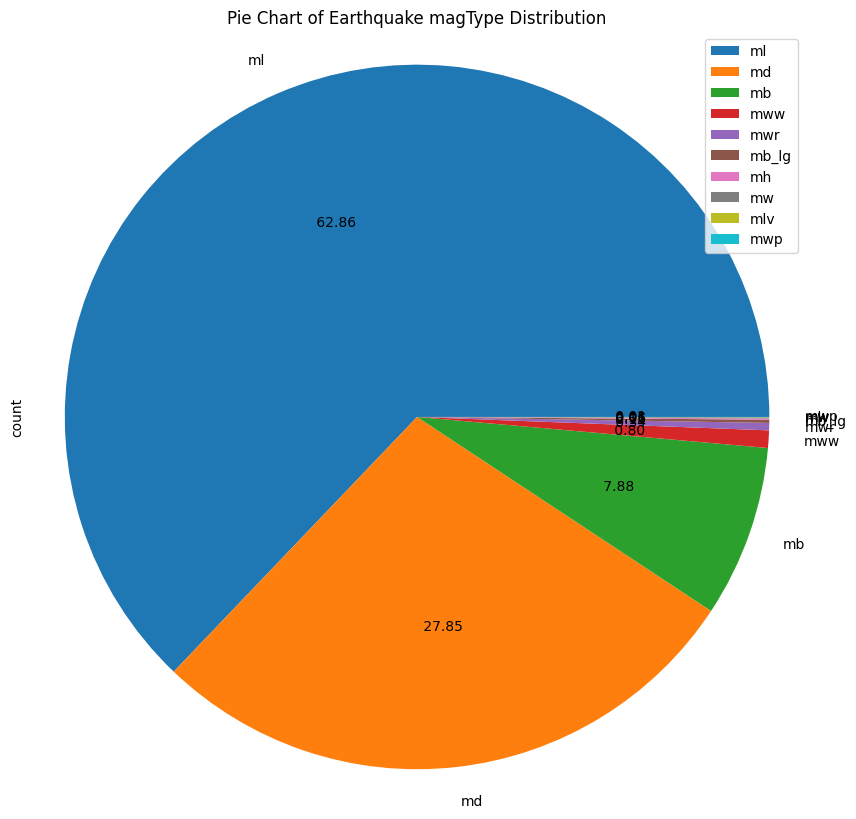

In [10]:
## Pie chart

fig, ax = plt.subplots(figsize=(10, 10))
magType_counts.plot(kind = 'pie', y='count', labels = magType_counts['magType'], autopct =' %1.2f', ax=ax)
plt.title('Pie Chart of Earthquake magType Distribution')
plt.axis('equal')
plt.show()

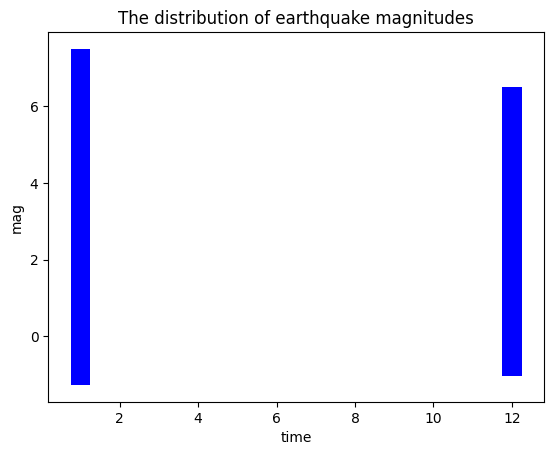

In [31]:
## Bar chart

months=earthquake_data['Month']
Magnitude = earthquake_data['mag']
plt.bar(months, Magnitude, width = 0.5, color = 'blue')
plt.xlabel('time')
plt.ylabel('mag')
plt.title('The distribution of earthquake magnitudes')
plt.show()

In [15]:
import calendar

In [24]:
# Extract the year and month from the time field
earthquake_data['Year'] = earthquake_data['time'].apply(lambda x: int(x[:4]))
earthquake_data['Month'] = earthquake_data['time'].apply(lambda x: calendar.month_name[int(x[5:7])])
earthquake_data['Day'] = earthquake_data['time'].apply(lambda x: calendar.day_name[int(x[7:9])])

earthquake_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Year,Month,Day
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,0.22,0.310,0.150,22.0,automatic,nc,nc,2024,January,Sunday
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,0.19,0.340,0.140,23.0,automatic,nc,nc,2024,January,Sunday
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,NaN,0.300,NaN,NaN,automatic,ak,ak,2024,January,Sunday
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,0.17,0.160,0.139,11.0,automatic,ci,ci,2024,January,Sunday
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,0.40,1.070,0.160,11.0,automatic,nc,nc,2024,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,2023-12-19T02:43:10.876Z,-7.242500,119.138700,593.76,4.90,mb,95.0,26.0,2.074000,0.75,...,3.86,6.268,0.054,107.0,reviewed,us,us,2023,December,Sunday
8882,2023-12-19T02:42:29.472Z,-22.785000,172.366200,10.00,5.30,mww,64.0,74.0,4.546000,0.74,...,10.15,1.808,0.075,17.0,reviewed,us,us,2023,December,Sunday
8883,2023-12-19T02:39:21.180Z,33.111333,-115.624833,9.51,1.34,ml,32.0,93.0,0.066410,0.19,...,0.21,0.520,0.214,20.0,reviewed,ci,ci,2023,December,Sunday
8884,2023-12-19T02:35:17.230Z,38.826332,-122.804833,3.06,0.64,md,8.0,147.0,0.005036,0.01,...,1.08,1.470,0.120,7.0,automatic,nc,nc,2023,December,Sunday


In [19]:
# Group the data by month and calculate the mean magnitude
monthly_magnitudes = earthquake_data.groupby('Month')['mag'].median()
monthly_magnitudes

Month
December    1.5
January     1.4
Name: mag, dtype: float64

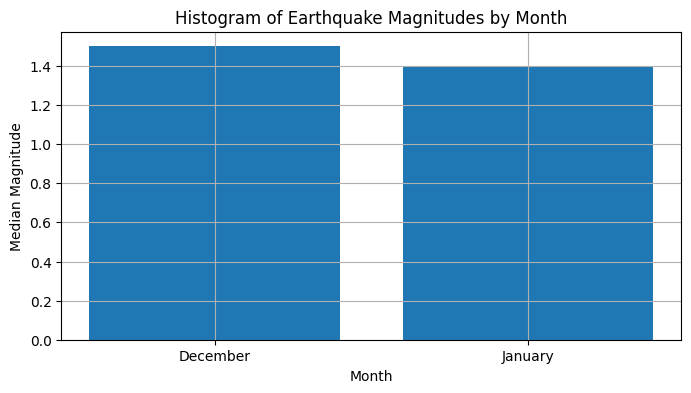

In [21]:


# Create a histogram with the month names on the x-axis
plt.figure(figsize=(8, 4))
plt.bar(monthly_magnitudes.index, monthly_magnitudes.values)
plt.title('Histogram of Earthquake Magnitudes by Month')
plt.xlabel('Month')
plt.ylabel('Median Magnitude')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [28]:
# Compute the monthly median magnitudes
median_magnitudes = earthquake_data.groupby(['Year', 'Month'])['mag'].median()
median_magnitudes

Year  Month
2023  12       1.5
2024  1        1.4
Name: mag, dtype: float64

In [37]:
# Select the first 30 days of data
head_30days = earthquake_data.head(30)




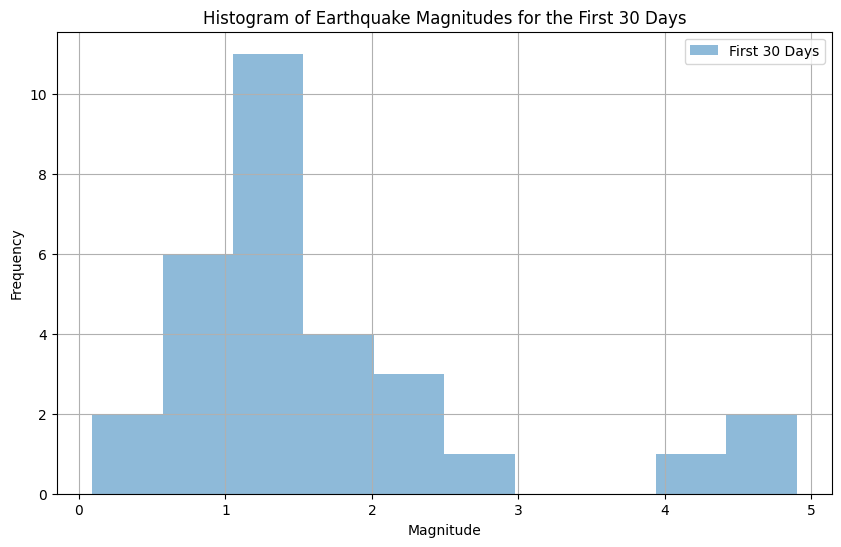

In [38]:
# Create a histogram of 'MAG' (magnitude) for the first 30 days
plt.figure(figsize=(10, 6))
plt.hist(head_30days['mag'], bins=10, alpha=0.5, label='First 30 Days')
plt.title('Histogram of Earthquake Magnitudes for the First 30 Days')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

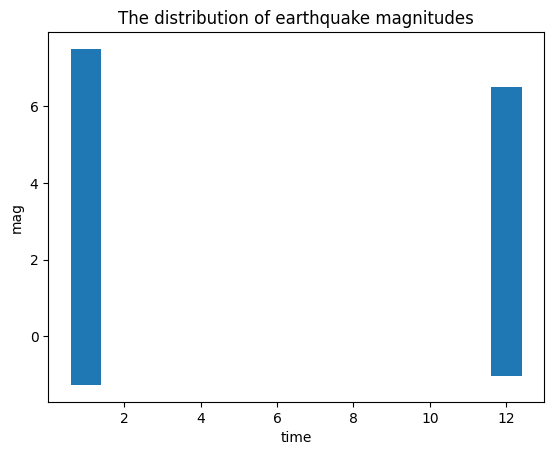

In [32]:
## Bar chart

plt.bar(earthquake_data['Month'], earthquake_data['mag'])
plt.xlabel('time')
plt.ylabel('mag')
plt.title('The distribution of earthquake magnitudes')
plt.show()

In [9]:
data = pd.read_csv('all_month.csv')
data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-01-18T02:18:19.690Z,38.807835,-122.823334,2.03,1.49,md,21.0,54.0,0.004681,0.02,...,2024-01-18T02:19:54.732Z,"7 km WNW of The Geysers, CA",earthquake,0.22,0.310,0.150,22.0,automatic,nc,nc
1,2024-01-18T02:16:52.710Z,38.808498,-122.823669,2.01,1.33,md,23.0,53.0,0.004320,0.02,...,2024-01-18T02:28:11.196Z,"7 km WNW of The Geysers, CA",earthquake,0.19,0.340,0.140,23.0,automatic,nc,nc
2,2024-01-18T01:55:45.006Z,64.994500,-147.409700,5.20,1.50,ml,NaN,NaN,NaN,0.60,...,2024-01-18T02:03:52.136Z,"10 km ENE of Fox, Alaska",earthquake,NaN,0.300,NaN,NaN,automatic,ak,ak
3,2024-01-18T01:48:21.130Z,36.020333,-117.781167,1.55,1.39,ml,27.0,62.0,0.013780,0.16,...,2024-01-18T01:54:25.834Z,"15 km NE of Little Lake, CA",earthquake,0.17,0.160,0.139,11.0,automatic,ci,ci
4,2024-01-18T01:46:32.440Z,38.826668,-122.853836,2.44,0.28,md,10.0,99.0,0.002529,0.01,...,2024-01-18T02:04:12.038Z,"10 km WNW of The Geysers, CA",earthquake,0.40,1.070,0.160,11.0,automatic,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8881,2023-12-19T02:43:10.876Z,-7.242500,119.138700,593.76,4.90,mb,95.0,26.0,2.074000,0.75,...,2024-01-16T01:30:21.040Z,"142 km NNE of Bima, Indonesia",earthquake,3.86,6.268,0.054,107.0,reviewed,us,us
8882,2023-12-19T02:42:29.472Z,-22.785000,172.366200,10.00,5.30,mww,64.0,74.0,4.546000,0.74,...,2024-01-15T23:45:16.040Z,southeast of the Loyalty Islands,earthquake,10.15,1.808,0.075,17.0,reviewed,us,us
8883,2023-12-19T02:39:21.180Z,33.111333,-115.624833,9.51,1.34,ml,32.0,93.0,0.066410,0.19,...,2023-12-19T15:49:01.616Z,"8 km N of Westmorland, CA",earthquake,0.21,0.520,0.214,20.0,reviewed,ci,ci
8884,2023-12-19T02:35:17.230Z,38.826332,-122.804833,3.06,0.64,md,8.0,147.0,0.005036,0.01,...,2023-12-19T04:50:10.666Z,"7 km NW of The Geysers, CA",earthquake,1.08,1.470,0.120,7.0,automatic,nc,nc


In [10]:
print(data.head())

                       time   latitude   longitude  depth   mag magType   nst  \
0  2024-01-18T02:18:19.690Z  38.807835 -122.823334   2.03  1.49      md  21.0   
1  2024-01-18T02:16:52.710Z  38.808498 -122.823669   2.01  1.33      md  23.0   
2  2024-01-18T01:55:45.006Z  64.994500 -147.409700   5.20  1.50      ml   NaN   
3  2024-01-18T01:48:21.130Z  36.020333 -117.781167   1.55  1.39      ml  27.0   
4  2024-01-18T01:46:32.440Z  38.826668 -122.853836   2.44  0.28      md  10.0   

    gap      dmin   rms  ...                   updated  \
0  54.0  0.004681  0.02  ...  2024-01-18T02:19:54.732Z   
1  53.0  0.004320  0.02  ...  2024-01-18T02:28:11.196Z   
2   NaN       NaN  0.60  ...  2024-01-18T02:03:52.136Z   
3  62.0  0.013780  0.16  ...  2024-01-18T01:54:25.834Z   
4  99.0  0.002529  0.01  ...  2024-01-18T02:04:12.038Z   

                          place        type horizontalError depthError  \
0   7 km WNW of The Geysers, CA  earthquake            0.22       0.31   
1   7 km WNW of 

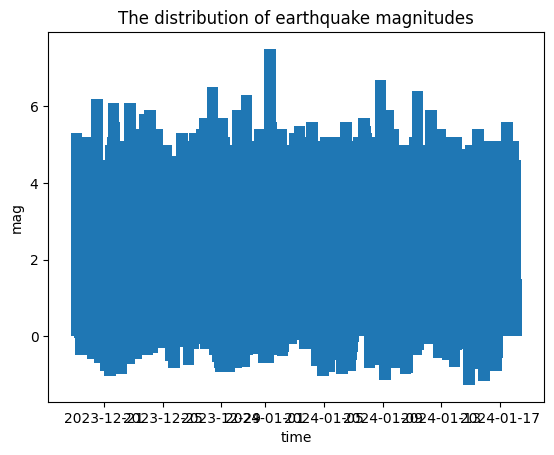

In [26]:
## Bar chart

plt.bar(data['time'], data['mag'])
plt.xlabel('time')
plt.ylabel('mag')
plt.title('The distribution of earthquake magnitudes')
plt.show()

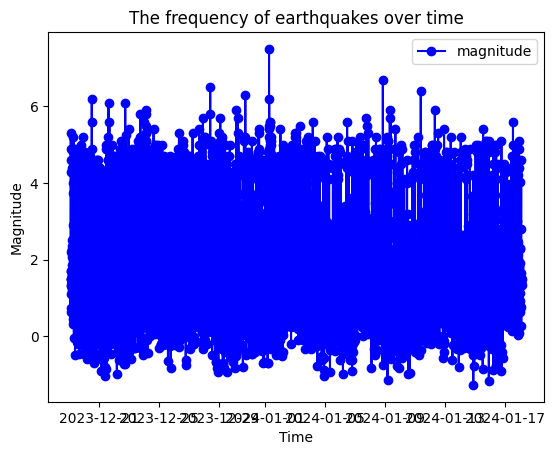

In [24]:
date_s = ['time']
mag_s = ['mag']
plt.plot(data['time'], data['mag'], color = 'b', marker = 'o', label = 'magnitude')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('The frequency of earthquakes over time')

plt.legend()
plt.show()

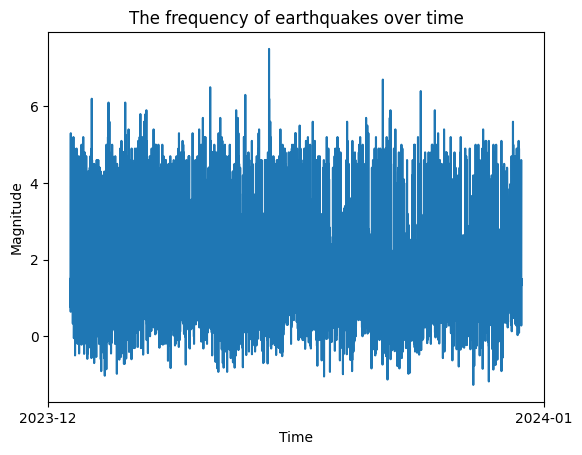

In [22]:
## Time series Line chart

data['time'] = pd.to_datetime(data['time'])
plt.plot(data['time'], data['mag'])
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('The frequency of earthquakes over time')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with a datetime column named 'timestamp' and numerical data column 'value'
# Make sure to replace 'timestamp' and 'value' with your actual column names

# Convert the 'timestamp' column to datetime if not already in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'timestamp' column as the DataFrame index
df.set_index('timestamp', inplace=True)

# Resample the data over weekly intervals and aggregate with mean (you can use other aggregation functions)
df_weekly = df.resample('W').mean()

# Plot the aggregated data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df_weekly.index, df_weekly['value'], marker='o', linestyle='-')
plt.title('Weekly Aggregated Time Series')
plt.xlabel('Date')
plt.ylabel('Aggregated Value')
plt.grid(True)
plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Data' is your DataFrame with 'Time' and 'Magnitude' columns
# Make sure to replace 'Time' and 'Magnitude' with your actual column names

# Convert the 'Time' column to datetime if not already in datetime format
data['time'] = pd.to_datetime(data['time'])

# Set the 'Time' column as the DataFrame index
data.set_index('time', inplace=True)

# Resample the data over weekly intervals and aggregate with mean
data_weekly = data.resample('W').mean()

# Plot the aggregated data using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(data_weekly.index, Data_weekly['magnitude'], marker='o', linestyle='-')
plt.title('Weekly Aggregated Time Series - Magnitude')
plt.xlabel('Time')
plt.ylabel('Aggregated Magnitude')
plt.grid(True)
plt.show()

NameError: name 'data' is not defined

In [20]:
data['time'] = pd.to_datetime(data['time'])  # Convert the date column to datetime if not already
data_resampled = data.resample('6M', on='time').mean()  # Resample data for every 6 months

C:\Users\kater\AppData\Local\Temp\ipykernel_5960\2192062773.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data.resample('6M', on='time').mean()  # Resample data for every 6 months


TypeError: agg function failed [how->mean,dtype->object]

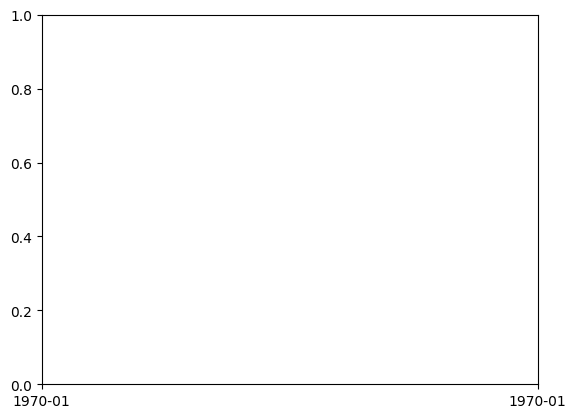

In [21]:
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

In [18]:
data['time'] = pd.to_datetime(data['time'])  # Convert the date column to datetime if not already
data_resampled = data.resample('6M', on='time').mean()  # Resample data for every 6 months

C:\Users\kater\AppData\Local\Temp\ipykernel_5960\2192062773.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_resampled = data.resample('6M', on='time').mean()  # Resample data for every 6 months


TypeError: agg function failed [how->mean,dtype->object]

In [1]:

import folium


ModuleNotFoundError: No module named 'folium'

In [ ]:
import folium
import pandas as pd

# Load the dataset
data = pd.read_csv('earthquakes.csv')

# Initialize the map centered at the desired location and with the desired zoom level
m = folium.Map(location=[37.7749, -122.4194], zoom_start=6)

# Create a HeatMap object from the dataset
heatmap = folium.plugins.HeatMap(
    [(lat, lon, magnitude) for lat, lon, magnitude in data.values],
    radius=10,
    blur=10,
    max_zoom=10,
)

# Add the HeatMap object to the map
m.add_child(heatmap)

# Display the map
m